### 수면의 질에 관한 상관관계
- 데이터 : Sleep_health_and_lifestyle_dataset.csv
- 타겟 몇 개를 제외하고 전체를 피쳐를 잡거나 2개~3개로 피쳐로 잡아서 관계 알아보기
- 피쳐 : 1. stress Level, Heart Rate
    * 2. sleep Duration, Quality of Sleep
    * 3. Blood Pressure, Heart Rate
    * 4. Physical Activity Level, Daily Steps
- 타겟 : 1. occupation
    * 2. sleep Disorder
    * 3. BMI
- 기계학습 : 1. 지도학습 + 분류
    * 2. 지도학습 + 다중분류
- KNN Classifier, LogisticRegression, SVC, DesionTreeClassifier

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [45]:
data = './data/Sleep_health_and_lifestyle_dataset.csv'

In [46]:
sleepDF = pd.read_csv(data)
sleepDF

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [47]:
# 데이터 확인
sleepDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [48]:
# 중복데이터
sleepDF.duplicated().sum()

0

In [49]:
# 결측치 체크
sleepDF.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [50]:
# 결측치 None으로 대체
sleepDF = sleepDF.fillna('None')

In [51]:
sleepDF

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


- 피쳐 : stress Level, Heart Rate
    * sleep Duration, Quality of Sleep
    * Blood Pressure, Heart Rate
    * Physical Activity Level, Daily Steps
- 타겟 : occupation
    * sleep Disorder
    * BMI

In [52]:
sleepDF = pd.read_csv(data, usecols=[3,7,10])
sleepDF

,Occupation,Stress Level,Heart Rate
0,Software Engineer,6,77
1,Doctor,8,75
2,Doctor,8,75
3,Sales Representative,8,85
4,Sales Representative,8,85
...,...,...,...
369,Nurse,3,68
370,Nurse,3,68
371,Nurse,3,68
372,Nurse,3,68


In [53]:
sleepDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Occupation    374 non-null    object
 1   Stress Level  374 non-null    int64 
 2   Heart Rate    374 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.9+ KB


In [54]:
# 'Doctor', 'Nurse' 두가지 품종 데이터만 추출
mask = sleepDF.Occupation.isin(['Doctor', 'Nurse'])

twosleepDF = sleepDF[mask]

twosleepDF = twosleepDF.reset_index(drop=True)

twosleepDF.info()

print(twosleepDF.head(3), twosleepDF.tail(3), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Occupation    144 non-null    object
 1   Stress Level  144 non-null    int64 
 2   Heart Rate    144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB
  Occupation  Stress Level  Heart Rate
0     Doctor             8          75
1     Doctor             8          75
2     Doctor             6          70
    Occupation  Stress Level  Heart Rate
141      Nurse             3          68
142      Nurse             3          68
143      Nurse             3          68


In [55]:
feature = twosleepDF[twosleepDF.columns[1:]]
feature.head()

,Stress Level,Heart Rate
0,8,75
1,8,75
2,6,70
3,6,70
4,6,70


In [56]:
target = twosleepDF.Occupation

target=target.replace({'Doctor':0, 'Nurse':1}).copy()

print(target.head(3), target.tail(3), sep='\n\n')

0    0
1    0
2    0
Name: Occupation, dtype: int64

141    1
142    1
143    1
Name: Occupation, dtype: int64


In [57]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [58]:
#(4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [59]:
#(4-2) 학습 진행 fit(2D, 1D)
model.fit(feature, target)

KNeighborsClassifier()

In [60]:
# 학습 후 속성 확인 => 속성명_ : 모델 파라미터 -> 모델 학습 후 생성 및 저장됨!
print("classes_ : ", model.classes_)
print("feature_names_in_ : ", model.feature_names_in_)
print("n_features_in_ : ", model.n_features_in_)

classes_ :  [0 1]
feature_names_in_ :  ['Stress Level' 'Heart Rate']
n_features_in_ :  2


In [61]:
model.score(feature, target)

0.9583333333333334

In [62]:
# [스트레스 레벨, 심박수]
new_data = pd.DataFrame([[7, 90]], columns=model.feature_names_in_)

pred_y = model.predict(new_data)

pred_y

array([0], dtype=int64)

In [63]:
# 예측 확률
model.predict_proba(new_data)

array([[0.8, 0.2]])

In [64]:
# 데이터와 최근접 이웃 데이터기 => kneighbors() 메서드
# 반환값 : 거리, 원소번호
dis, ind = model.kneighbors(new_data)

# ndarray => list
ind.tolist()[0]

[85, 84, 74, 72, 13]

In [65]:
# K개의 최근접 이웃 데이터만 저장
kneighDF = feature.iloc[ind.tolist()[0]]

In [66]:
feature.index, feature.shape

(RangeIndex(start=0, stop=144, step=1), (144, 2))

<Axes: xlabel='Stress Level', ylabel='Heart Rate'>

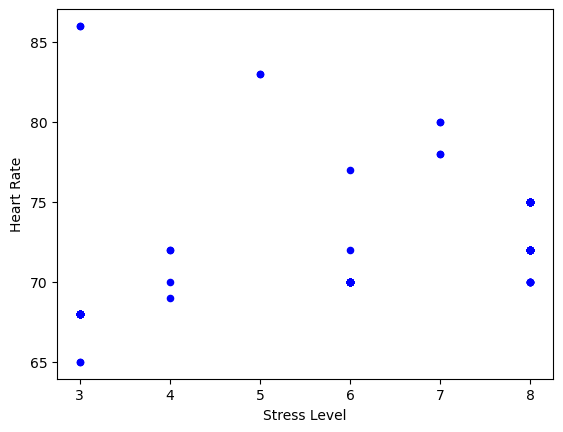

In [67]:
feature.plot.scatter(x='Stress Level', y='Heart Rate', c='blue')

In [68]:
import matplotlib.pyplot as plt

In [73]:
x, y = model.kneighbors(new_data)
x, y

(array([[ 5.65685425,  5.65685425,  7.28010989,  7.28010989, 10.        ]]),
 array([[85, 84, 74, 72, 13]], dtype=int64))

In [75]:
feature

,Stress Level,Heart Rate
0,8,75
1,8,75
2,6,70
3,6,70
4,6,70
...,...,...
139,3,68
140,3,68
141,3,68
142,3,68
